<a href="https://colab.research.google.com/github/ayarzuki/Orbit-Futur-Academy/blob/main/%5B6_10_21%5D_Supermaket_Analys.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**General Insight**

In [1]:
# pip install pandas-profiling

In [2]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
# from pandas_profiling import ProfileReport

In [3]:
!wget -O supermarket.csv https://raw.githubusercontent.com/dzeaulfath/Python/main/DataSet/supermarket_sales%20-%20Sheet1.csv

--2021-10-06 04:19:25--  https://raw.githubusercontent.com/dzeaulfath/Python/main/DataSet/supermarket_sales%20-%20Sheet1.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.111.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 131528 (128K) [text/plain]
Saving to: ‘supermarket.csv’

supermarket.csv     100%[===================>] 128.45K  --.-KB/s    in 0.02s   

2021-10-06 04:19:25 (5.80 MB/s) - ‘supermarket.csv’ saved [131528/131528]



In [4]:
#Menampilkan Data

df = pd.read_csv('supermarket.csv')
df.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


In [5]:
#For Search duplicate Row
df.duplicated().sum()

0

In [6]:
#For Search Missing value
df.isna().sum()

Invoice ID                 0
Branch                     0
City                       0
Customer type              0
Gender                     0
Product line               0
Unit price                 0
Quantity                   0
Tax 5%                     0
Total                      0
Date                       0
Time                       0
Payment                    0
cogs                       0
gross margin percentage    0
gross income               0
Rating                     0
dtype: int64

In [7]:
# dataset = pd.read_csv('supermarket.csv')
# ProfileReport(dataset)

General Insights


* Customer Rating has a normal distribution . The quartiles are evenly distributed.
* The number of sales is very similar in all Branches with a slightly superiority in Branch A.
*   The Credit Card is the payment method less used
*   There is no correlation between Rating and gross income.,
*   Branch C has a slightly higher data dispersion than the rest of Branches
*  Women apparently use to generate sales with a higher gross income than men
*   The temporal distribution behaves quite homogeneously. We found an increase in median earnings in the days leading up to 02/15 that could be related to Valentine's Day sales.




---



---



---



---



---



---


**Analysis Next Step**

In [8]:
#Menghitung gender

df['Gender'].value_counts()

Female    501
Male      499
Name: Gender, dtype: int64

In [9]:
#Membuat dummies dari product

gender_dummies=pd.get_dummies(df['Gender'])
gender_dummies.head()

,Female,Male
0,1,0
1,1,0
2,0,1
3,0,1
4,0,1


In [10]:
#Menampilkan Table berdasarkan Gender

df=pd.concat([df,gender_dummies],axis=1)
df.head(2)

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating,Female,Male
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1,1,0
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6,1,0


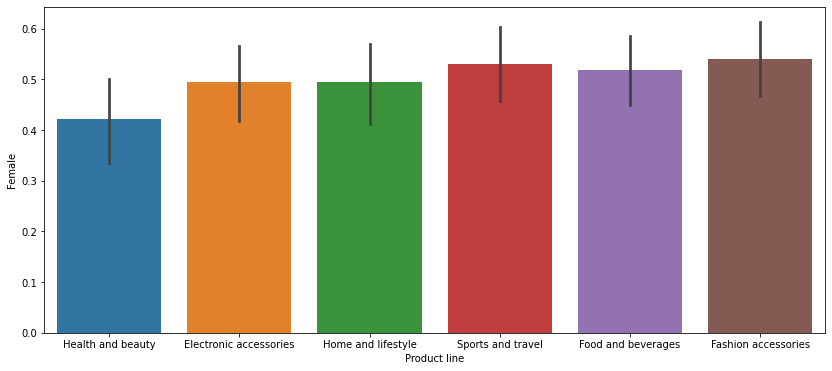

In [11]:
#Menampilkan Grafik dari Gender Perempuan

plt.figure(figsize=(14,6))
sns.barplot(x='Product line',y='Female',data=df)
plt.show()

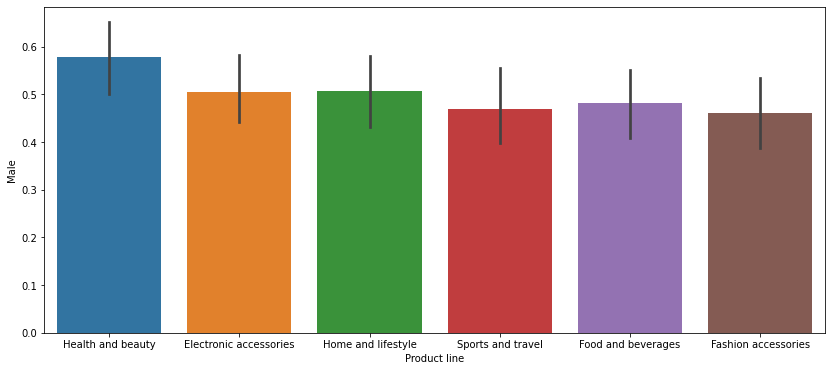

In [12]:
# Menampilkan Grafik dari gender Laki- Laki

plt.figure(figsize=(14,6))
sns.barplot(x='Product line',y='Male',data=df)

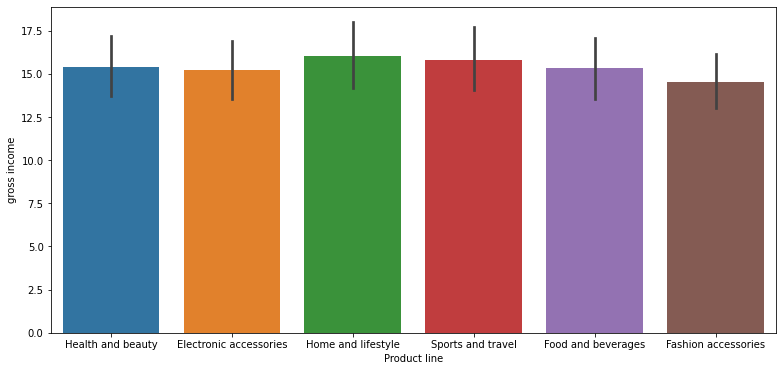

In [13]:
#Mencari Gross Income tertinggi dari Penjualan

plt.figure(figsize=(13,6))
sns.barplot(x="Product line",y="gross income",data=df)

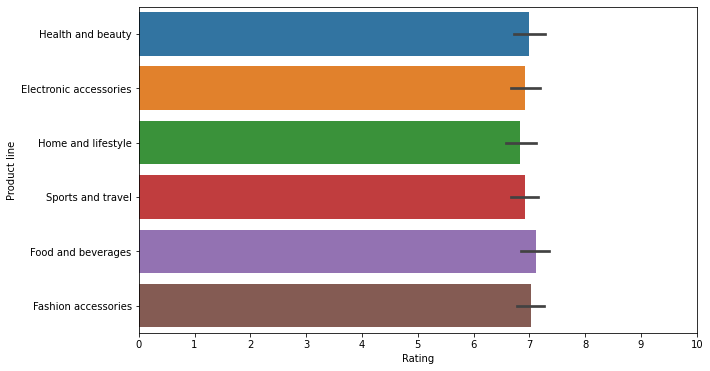

In [14]:
# Mencari Rating dari Jenis Produk

xdata=[0,1,2,3,4,5,6,7,8,9,10]
plt.figure(figsize=(10,6))
sns.barplot(y=df['Product line'],x=df['Rating'])
plt.xticks(xdata)
plt.show()

In [15]:
#Menampilkan Quantity

dv=pd.DataFrame(df['Quantity'].value_counts())
dv

,Quantity
10,119
1,112
4,109
7,102
5,102
6,98
9,92
2,91
3,90
8,85


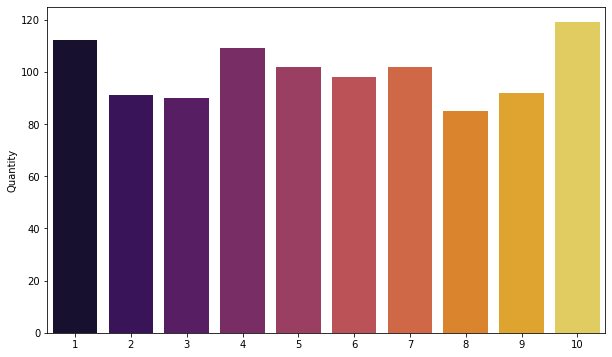

In [16]:
#Menampilkan Grafik dari Kuantitas

plt.figure(figsize=(10,6))
sns.barplot(x=dv.index,y=dv['Quantity'],palette='inferno')

**Insight Dari data diatas**

* Total Customers = 1000
* Total Females = 501
* Total Males = 499
* Min Rating = 4
* Max Rating = 10
* Average Rating = 6.97
* Best Average Rating in Food & Beverages
* Max Average Gross Income in Home & Lifestyle
* Min Average Gross Income in Fashion Accessories
* Maximum customers buys 10 quantities
* Max Average total bill in Home and lifestyle
* Min Average total bill in Fashion Accessories
* Maximum People pays through e-wallet
* Maximum people comes from Yangon City
* Max Average Sales of Fashion Accessories is from Females
* Max Average Sales of Health & Beauty is from Males




---


---



---



---



**Payment Section**

In [17]:
#Show index/ jenis jenis dari Payment

df['Payment'].value_counts().keys()

Index(['Ewallet', 'Cash', 'Credit card'], dtype='object')

In [18]:
#Cek seberapa banyak pelanggan menggunakan masing-masing metode Payment

df['Payment'].value_counts()

Ewallet        345
Cash           344
Credit card    311
Name: Payment, dtype: int64

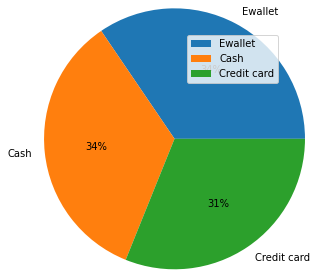

In [19]:
#Menampilkan Pie Chart dari masing masing Payment

plt.pie(df['Payment'].value_counts(),labels=df['Payment'].value_counts().keys(),autopct='%1.0f%%',radius=1.5)
plt.legend()
plt.show()

In [20]:
#Menampilkan rata-rata Kuantitas Pembelian dari masing-masing payment

df.groupby('Payment')['Quantity'].mean()

Payment
Cash           5.511628
Credit card    5.536977
Ewallet        5.484058
Name: Quantity, dtype: float64

In [21]:
#Menampilkan mean dari masing masing metode payment

df.groupby('Payment')['Total'].mean()

Payment
Cash           326.181890
Credit card    324.009878
Ewallet        318.820600
Name: Total, dtype: float64

**Insight Dari Payment diatas**

* Tidak ada perbedaan antara kuantitas pada masing masing jumlah pembayaran
* Tidak ada perbedaan yang mencolok terhadap total uang yang digunakan dalam setiap metode pembayaran




---



---



---



**Customer Type**

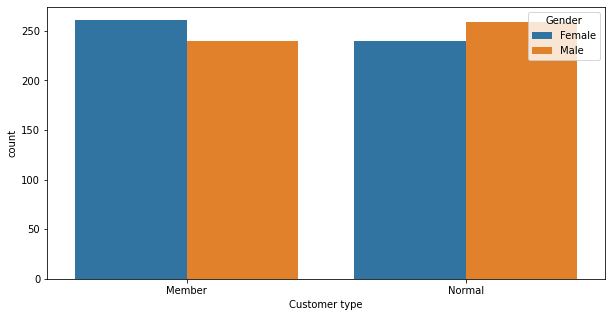

In [22]:
#Menampilkan Grafik berdasarkan Customer Type dan Gender

fig1, ax1 = plt.subplots(figsize=(10,5))
sns.countplot(x = 'Customer type',hue='Gender',data=df)

In [23]:
#Menampilkan Gross income dari Tipe Customer

df.groupby('Customer type')['gross income'].sum()

Customer type
Member    7820.164
Normal    7559.205
Name: gross income, dtype: float64

In [24]:
# Menampilkan Pembayar Pajak terbanyak pada tipe Customer

df.groupby('Customer type')['Tax 5%'].sum()

Customer type
Member    7820.164
Normal    7559.205
Name: Tax 5%, dtype: float64

**Insight dari Costumer Type**

* Perempuan lebih banyak sebagai customer membership daripada laki laki
* Pemasukan dari membership customer lebih banyak dari customer biasa, maka dari itu supermarket harus memperbanyak promo untuk mendapatkan membership baru
* Dan juga sudah sangat jelas bahwa customer membership lebih banyak membayar pajak dari customer biasa




---


---



---



**Branch and City Type**

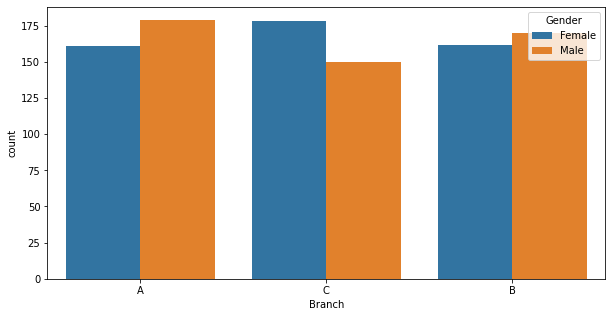

In [25]:
#Membandingkan Jumlah customer berdasarkan gender yang datang di tiap branch

fig1, ax1 = plt.subplots(figsize=(10,5))
sns.countplot(x='Branch',hue='Gender',data=df)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


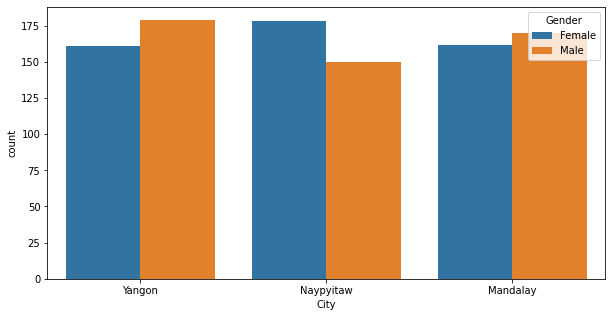

In [26]:
#Membandingkan Jumlah customer berdasarkan gender yang datang di tiap kota

fig1, ax1 = plt.subplots(figsize=(10,5))
sns.countplot(df['City'],hue=df['Gender'])

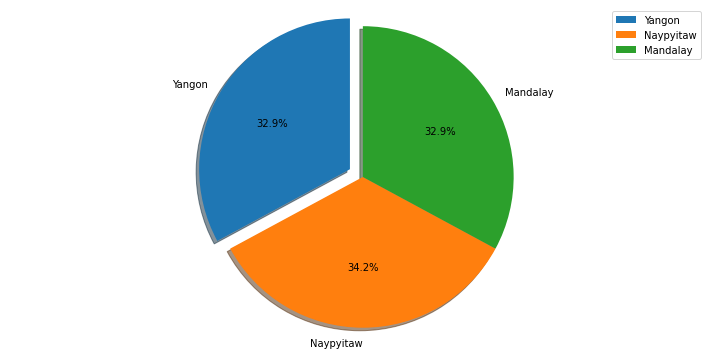

In [27]:
#Menampilkan Kota dengan pendapatan tertinggi

explode = (0.1, 0, 0)
fig1, ax1 = plt.subplots(figsize=(10,5))
ax1.pie(df.groupby('City')['gross income'].sum(),explode=explode, labels=df['City'].unique(), autopct='%1.1f%%',
        shadow=True, startangle=90)

# Equal digunakan agar pie chart berbentuk lingkaran
ax1.axis('equal')  
plt.tight_layout()
plt.legend()
plt.show()

In [28]:
# Menampilkan Total Quantitas Pembelian di setiap branch

df.groupby('City')['Quantity'].sum()

City
Mandalay     1820
Naypyitaw    1831
Yangon       1859
Name: Quantity, dtype: int64

In [29]:
#Menampilkan rata-rata Rating yang diberikan Pelanggan pada setiap branch

df.groupby('Branch')['Rating'].mean()

Branch
A    7.027059
B    6.818072
C    7.072866
Name: Rating, dtype: float64

**Insight Dari Branch Type**

* Pada branch C pembeli perempuan lebih banyak, sehingga jika branch C difokuskan ke pembeli perempuan maka akan lebih meraup banyak keuntungan
* Kemudian Kota Napyitaw menghasilkan keuntungan sedikit lebih banyak dari yang lain
* Branch C mendapatkan penilaian paling buruk dari yang lain, sehingga branch C harus memperbaiki kinerjanya